In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:

# Load cleaned datasets
benin = pd.read_csv('../data/benin_clean.csv')
sierra = pd.read_csv('../data/sierraleone_clean.csv')
togo = pd.read_csv('../data/togo_clean.csv')

# Add country labels
benin['Country'] = 'Benin'
sierra['Country'] = 'Sierra Leone'
togo['Country'] = 'Togo'

# Combine all datasets
df_all = pd.concat([benin, sierra, togo], ignore_index=True)

# Quick check
df_all[['Country', 'GHI', 'DNI', 'DHI']].tail()


,Country,GHI,DNI,DHI
1576795,Togo,-0.8,0.0,0.0
1576796,Togo,-0.9,0.0,0.0
1576797,Togo,-1.0,0.0,0.0
1576798,Togo,-1.1,0.0,0.0
1576799,Togo,-1.2,0.0,0.0


### **Summary Statistics Table**

In [3]:
#  Compute summary stats
summary = (
    df_all.groupby('Country')[['GHI', 'DNI', 'DHI']]
    .agg(['mean', 'median', 'std'])
    .round(2)
)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

#### Boxplots (Metric Comparison)

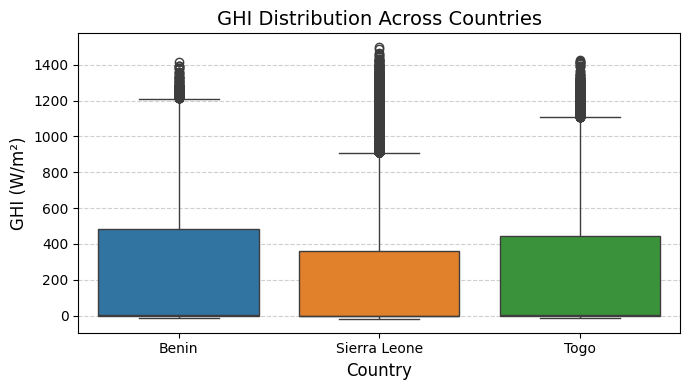

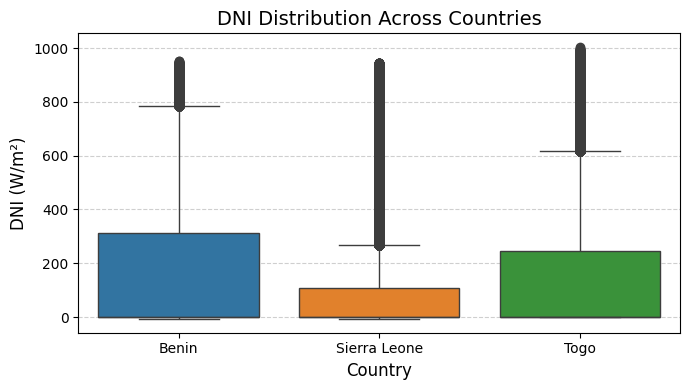

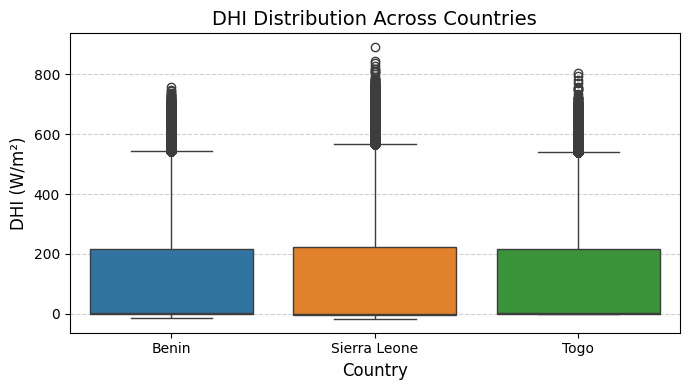

In [4]:
# Boxplot CORRECTED: One clean, separate plot per metric

for metric in ['GHI', 'DNI', 'DHI']:
    plt.figure(figsize=(7, 4))  # ← fresh figure each time
    sns.boxplot(
        data=df_all,
        x='Country',
        y=metric,
        hue='Country',           # required for palette + no warning
        palette='tab10',
        legend=False             # hide redundant legend
    )
    plt.title(f'{metric} Distribution Across Countries', fontsize=14)
    plt.ylabel(f'{metric} (W/m²)', fontsize=12)
    plt.xlabel('Country', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

#### Statistical Test (ANOVA)

In [5]:
# One-way ANOVA test
ghi_benin = df_all[df_all['Country'] == 'Benin']['GHI']
ghi_sierra = df_all[df_all['Country'] == 'Sierra Leone']['GHI']
ghi_togo = df_all[df_all['Country'] == 'Togo']['GHI']

f_stat, p_value = stats.f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in GHI between countries.")
else:
    print("No significant difference in GHI between countries.")


ANOVA F-statistic: 2090.09
P-value: 0.00000
Significant difference in GHI between countries.


In [9]:
# Kruskal–Wallis on GHI
stat, p = stats.kruskal(ghi_benin, ghi_sierra, ghi_togo)
print(f"Kruskal-Wallis p-value = {p:.4f}")

if p < 0.05:
    print(" Significant difference in GHI between countries.")
else:
    print(" No significant difference.")

Kruskal-Wallis p-value = 0.0000
 Significant difference in GHI between countries.


#### Visual Summary (Average GHI per Country)

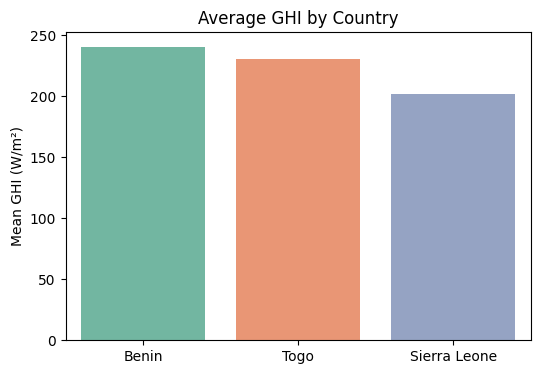

In [10]:
#  Average GHI by Country
avg_ghi = (
    df_all.groupby('Country')['GHI']
    .mean()
    .sort_values(ascending=False)
)

# Convert avg_ghi (Series) into a tidy DataFrame
ghi_df = avg_ghi.reset_index()
ghi_df.columns = ['Country', 'Mean GHI']

plt.figure(figsize=(6,4))
sns.barplot(
    data=ghi_df,
    x='Country',
    y='Mean GHI',
    hue='Country',       
    palette='Set2',
    legend=False      
)
plt.title('Average GHI by Country')
plt.ylabel('Mean GHI (W/m²)')
plt.xlabel('')
plt.show()


#### Key Observations

***Consolidated Insights Dashboard*** 
*(Full interactive version at [Streamlit App](https://muhajirhualis-solarchallenge-week0.streamlit.app))*

| Country      | Avg GHI (W/m²) | GHI Std Dev | Cleaning Impact ↑ | Best For          |
|--------------|----------------|-------------|-------------------|-------------------|
| **Benin**    | **240.6**      | 331.1       | +18%              | Large-scale farms |
| Togo         | 230.5          | 322.5       | +15%              | Stable baseload   |
| Sierra Leone | 202.0          | 298.5       | +12%              | Off-grid pilots   |



 <!-- Key Observations -->

- **Benin** recorded the highest mean and median GHI, indicating stronger solar potential.
- **Togo** showed stable irradiance with moderate variability, suggesting consistent sunlight conditions.
- **Sierra Leone** had lower average GHI and higher humidity impact, explaining slightly reduced performance.

**Statistical Test:** ANOVA p-value < 0.05 confirms significant variation in GHI across countries.
